In [2]:
import pandas as pd
import numpy as np
from collections import *
from itertools import isliceseq_len
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import os
import time
import csv
import logging
import threading
from multiprocessing import Process, Pool, Manager
import multiprocessing as mp
import os

In [8]:
dates = os.listdir('./KISTI_rawdata/')

In [9]:
dates

['.DS_Store', '20190714', '.ipynb_checkpoints']

In [5]:
dates= dates[:2]

In [11]:
with open('./KISTI_rawdata/' + dates[1]+'/conn.00:00:00-01:00:00.log') as f:
    f = f.readlines()
for line in f:
    if line.split("\t")[0]=='#fields':
        columns = line.split("\t")[1:]
        for i, c in enumerate(columns):
            if len(c.split("\n"))>1:
                columns[i] = c.split("\n")[0]
        break

In [19]:
# conn_lst = ['conn.00:00:00-01:00:00.log', 'conn.01:00:00-02:00:00.log', 'conn.02:00:00-03:00:00.log', 'conn.03:00:00-04:00:00.log',\
#             'conn.04:00:00-05:00:00.log', 'conn.05:00:00-06:00:00.log', 'conn.06:00:00-07:00:00.log', 'conn.07:00:00-08:00:00.log',\
#             'conn.08:00:00-09:00:00.log', 'conn.09:00:00-10:00:00.log', 'conn.10:00:00-11:00:00.log', 'conn.11:00:00-12:00:00.log',\
#             'conn.12:00:00-13:00:00.log', 'conn.13:00:00-14:00:00.log', 'conn.14:00:00-15:00:00.log', 'conn.15:00:00-16:00:00.log',\
#             'conn.16:00:00-17:00:00.log', 'conn.17:00:00-18:00:00.log', 'conn.18:00:00-19:00:00.log', 'conn.19:00:00-20:00:00.log',\
#             'conn.20:00:00-21:00:00.log', 'conn.21:00:00-22:00:00.log', 'conn.22:00:00-23:00:00.log', 'conn.23:00:00-00:00:00.log']
conn_lst = ['conn.00-00-00-01-00-00.log', 'conn.01-00-00-02-00-00.log', 'conn.02-00-00-03-00-00.log', 'conn.03-00-00-04-00-00.log',\
            'conn.04-00-00-05-00-00.log', 'conn.05-00-00-06-00-00.log']

In [20]:
# weird_lst = ['weird.00:00:00-01:00:00.log', 'weird.01:00:00-02:00:00.log', 'weird.02:00:00-03:00:00.log', 'weird.03:00:00-04:00:00.log',\
#             'weird.04:00:00-05:00:00.log', 'weird.05:00:00-06:00:00.log', 'weird.06:00:00-07:00:00.log', 'weird.07:00:00-08:00:00.log',\
#             'weird.08:00:00-09:00:00.log', 'weird.09:00:00-10:00:00.log', 'weird.10:00:00-11:00:00.log', 'weird.11:00:00-12:00:00.log',\
#             'weird.12:00:00-13:00:00.log', 'weird.13:00:00-14:00:00.log', 'weird.14:00:00-15:00:00.log', 'weird.15:00:00-16:00:00.log',\
#             'weird.16:00:00-17:00:00.log', 'weird.17:00:00-18:00:00.log', 'weird.18:00:00-19:00:00.log', 'weird.19:00:00-20:00:00.log',\
#             'weird.20:00:00-21:00:00.log', 'weird.21:00:00-22:00:00.log', 'weird.22:00:00-23:00:00.log', 'weird.23:00:00-00:00:00.log']
weird_lst = ['weird.00-00-00-01-00-00.log', 'weird.01-00-00-02-00-00.log', 'weird.02-00-00-03-00-00.log', 'weird.03-00-00-04-00-00.log',\
            'weird.04-00-00-05-00-00.log', 'weird.05-00-00-06-00-00.log']

In [18]:
# def thread_function(name):
#     lock = threading.Lock()
#     logging.info("Thread %s: starting", name)
#     dfs = []
#     for c in conn_lst:
#         try:
#             dfs.append(pd.read_csv('./logs/' + name + '/'+ c, delimiter="\t", header=None, names=columns, skiprows=lambda x:x in range(8), skipfooter=1))
#             print(c," done in ", name)
#         except:
#             print(c)
#             continue
#     df = pd.concat(dfs)
#     lock.acquire()
#     df_lst[name] = df
#     lock.release()
#     logging.info("Thread %s: finishing", name)

In [19]:
# if __name__ == "__main__":
#     format = "%(asctime)s: %(message)s"
#     logging.basicConfig(format=format, level=logging.INFO,
#                         datefmt="%H:%M:%S")

#     threads = list()
#     for index in dates:
#         logging.info("Main    : create and start thread %s.", index)
#         x = threading.Thread(target=thread_function, args=(index,))
#         threads.append(x)
#         x.start()

#     for index, thread in enumerate(threads):
#         logging.info("Main    : before joining thread %d.", index)
#         thread.join()
#         logging.info("Main    : thread %d done", index)

In [49]:
def make_conn_dataframe_kisti():
    dfs = []
    for i, c in enumerate(conn_lst):
        print(c)
        df = pd.read_csv('./KISTI_rawdata/' + '20190714'+ '/'+ c, delimiter="\t", header=None, names=columns, skiprows=lambda x:x in range(8), skipfooter=1)
        dfs.append(df)
    df = pd.concat(dfs)
    return df

In [50]:
df = make_conn_dataframe_kisti()

conn.00-00-00-01-00-00.log


/Users/jeeyung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


conn.01-00-00-02-00-00.log
conn.02-00-00-03-00-00.log
conn.03-00-00-04-00-00.log
conn.04-00-00-05-00-00.log
conn.05-00-00-06-00-00.log


In [3]:
df = pd.read_csv('./data/CTU-13-Dataset/pre_vae_12689_small_False_60_False.csv', index_col=[0])

In [6]:
df.head()

,arp,class,dhcp,dns,duration mean,duration std,http,icmp,id.orig_h,id.orig_p,...,orig_pkts mean,orig_pkts std,rtp,smtp,sripcnt,ssh,ssl,tcp,time_chunk,udp
0,0.0,normal,0.0,0.0,6.005131e-05,0.000000e+00,0.0,0.0,147.32.84.164,0.000580,...,0.000104,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0,0.000000
1,0.0,botnet,0.0,0.0,1.617557e-03,7.587212e-03,1.0,0.0,147.32.84.165,0.006384,...,0.000019,0.000124,0.0,0.0,0.003614,0.0,0.0,1.000000,0,0.000000
2,0.0,normal,0.0,0.0,2.498211e-03,1.831519e-02,0.0,0.0,147.32.84.170,0.015670,...,0.000077,0.000241,0.0,0.0,0.009396,0.0,0.0,0.333333,0,0.666667
3,0.0,normal,0.0,0.0,7.925952e-08,2.327662e-08,0.0,0.0,147.32.87.36,0.002902,...,0.000021,0.000000,0.0,0.0,0.001807,0.0,0.0,0.000000,0,1.000000
4,0.0,botnet,0.0,0.0,4.695379e-04,4.093442e-03,1.0,0.0,147.32.84.165,0.022055,...,0.000005,0.000067,0.0,0.0,0.013372,0.0,0.0,1.000000,1,0.000000


In [15]:
df.columns

Index(['arp', 'class', 'dhcp', 'dns', 'duration mean', 'duration std', 'http',
       'icmp', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'igmp',
       'ntp', 'orig_ip_bytes mean', 'orig_ip_bytes std', 'orig_pkts mean',
       'orig_pkts std', 'rtp', 'smtp', 'sripcnt', 'ssh', 'ssl', 'tcp',
       'time_chunk', 'udp'],
      dtype='object')

In [ ]:
#duration mean / orig_ip_bytes mean / orig_pkts mean / 

In [16]:
normal_df = df[df["class"]=='normal']

In [17]:
normal_df.head()

,arp,class,dhcp,dns,duration mean,duration std,http,icmp,id.orig_h,id.orig_p,...,orig_pkts mean,orig_pkts std,rtp,smtp,sripcnt,ssh,ssl,tcp,time_chunk,udp
0,0.0,normal,0.0,0.0,6.005131e-05,0.000000e+00,0.0,0.0,147.32.84.164,0.000580,...,0.000104,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0,0.000000
2,0.0,normal,0.0,0.0,2.498211e-03,1.831519e-02,0.0,0.0,147.32.84.170,0.015670,...,0.000077,0.000241,0.0,0.0,0.009396,0.0,0.0,0.333333,0,0.666667
3,0.0,normal,0.0,0.0,7.925952e-08,2.327662e-08,0.0,0.0,147.32.87.36,0.002902,...,0.000021,0.000000,0.0,0.0,0.001807,0.0,0.0,0.000000,0,1.000000
5,0.0,normal,0.0,0.0,7.540395e-06,2.993598e-05,0.0,0.0,147.32.84.170,0.013929,...,0.000057,0.000109,0.0,0.0,0.008312,0.0,0.0,0.333333,1,0.666667
7,0.0,normal,0.0,0.0,6.669004e-06,2.531666e-05,0.0,0.0,147.32.84.170,0.013929,...,0.000057,0.000111,0.0,0.0,0.008312,0.0,0.0,0.333333,2,0.666667


In [18]:
botnet_df = df[df["class"]=='botnet']

In [30]:
normal_df["duration mean"].mean()

0.11225974364121788

In [32]:
botnet_df["duration mean"].mean()

0.009918175916902508

In [33]:
normal_df["orig_ip_bytes mean"].mean()

0.0014439552327691005

In [34]:
botnet_df["orig_ip_bytes mean"].mean()

6.451991171530152e-05

In [35]:
normal_df["orig_pkts mean"].mean()

0.001699862871982783

In [36]:
botnet_df["orig_pkts mean"].mean()

0.00015936666085377153

In [25]:
with open('./KISTI_rawdata/' + '20190714'+'/weird.00-00-00-01-00-00.log') as f:
    f = f.readlines()
for line in f:
    if line.split("\t")[0]=='#fields':
        w_columns = line.split("\t")[1:]
        for i, c in enumerate(w_columns):
            if len(c.split("\n"))>1:
                w_columns[i] = c.split("\n")[0]
        break

In [53]:
def make_conn_dataframe_kisti_weird():
    dfs = []
    for i, c in enumerate(weird_lst):
        print(c)

        df = pd.read_csv('./KISTI_rawdata/' + '20190714' + '/'+ c, delimiter="\t", header=None, names=w_columns, skiprows=lambda x:x in range(8), skipfooter=1)
        dfs.append(df)
    df = pd.concat(dfs)
    return df

In [54]:
weird_df = make_conn_dataframe_kisti_weird()

weird.00-00-00-01-00-00.log


/Users/jeeyung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


weird.01-00-00-02-00-00.log
weird.02-00-00-03-00-00.log
weird.03-00-00-04-00-00.log
weird.04-00-00-05-00-00.log
weird.05-00-00-06-00-00.log


In [55]:
len(weird_df)

132844

In [29]:
weird_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,name,addl,notice,peer
0,1.563048e+09,C8hFvp4OsIwRpbSEwa,61.249.93.100,41444,210.98.26.212,443,possible_split_routing,-,F,zeek
1,1.563048e+09,C8hFvp4OsIwRpbSEwa,61.249.93.100,41444,210.98.26.212,443,data_before_established,-,F,zeek
2,1.563048e+09,C8hFvp4OsIwRpbSEwa,61.249.93.100,41444,210.98.26.212,443,inappropriate_FIN,-,F,zeek
3,1.563048e+09,CnmdkK41i0pfQNv8b,61.249.93.101,37534,210.98.50.168,443,possible_split_routing,-,F,zeek
4,1.563048e+09,CnmdkK41i0pfQNv8b,61.249.93.101,37534,210.98.50.168,443,data_before_established,-,F,zeek


In [81]:
len(weird_df.uid.unique())

64487

In [82]:
weird_df = weird_df.drop_duplicates(subset='uid')

In [83]:
len(weird_df)

64487

In [84]:
Counter(df.service.values)

Counter({'ntp': 138996,
         '-': 439258,
         'dns': 339373,
         'ssl': 36298,
         'http': 54502,
         'dhcp': 45,
         'ssh': 101,
         'smtp': 80,
         'imap': 29,
         'ftp': 31,
         'mysql': 1,
         'dtls': 6,
         'irc': 1,
         'ssl,smtp': 4,
         'ftp-data': 24,
         'ntlm,smb,gssapi': 4,
         'smb': 2})

In [85]:
merged_df = weird_df.drop(['ts'],axis=1).merge(df, on=['uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p'])

In [86]:
len(merged_df)

64350

In [87]:
merged_df["class"]="abnorm"

In [88]:
merged_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,name,addl,notice,peer,ts,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,class
0,Cn08tw4TYdEgsLZ4oa,61.249.93.101,35232,210.98.50.168,443,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SADFRR,14,1388,0,0,-,abnorm
1,CBzOBN1W4DpS0dOtX8,61.249.93.101,35294,210.98.50.168,443,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SAD,15,1375,0,0,-,abnorm
2,CymALZ3lyNs4Y7pj7i,61.249.94.113,44466,210.119.66.231,80,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SADFRR,9,1089,0,0,-,abnorm
3,C4VMM42zDL02w7Yty9,203.250.180.14,18004,211.239.236.9,80,above_hole_data_without_any_acks,-,F,zeek,1.563030e+09,...,F,F,0,^hacdttf,0,0,36,47159,-,abnorm
4,Cocgn7RiYeKi7Lpce,61.249.94.113,44630,210.119.66.231,80,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SADF,11,1930,0,0,-,abnorm


In [89]:
weird_uid = merged_df.uid.unique()

In [90]:
norm_df = df[~df.uid.isin(weird_uid)]

In [91]:
norm_df["class"]='norm'

/Users/jeeyung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
len(list(set(merged_df.columns).intersection(set(norm_df.columns))))

22

In [93]:
set(merged_df.columns) - set(norm_df)

{'addl', 'name', 'notice', 'peer'}

In [94]:
len(norm_df.columns)

22

In [95]:
merged_df = merged_df.drop(['addl','name','notice','peer'], axis=1)

In [96]:
total_df = merged_df.append(norm_df)

In [97]:
len(total_df)

1008755

### sampling dataframe

In [98]:
total_df = total_df.sample(frac=0.05, replace=False, random_state=1)

In [99]:
len(total_df)

50438

In [100]:
total_df["StartTime"] = pd.to_datetime(total_df['ts'],unit='s')

In [101]:
total_df.to_csv("kisti_logs_20190714_6.csv")

In [76]:
total_df.service.unique()

array(['dns', '-', 'ntp', 'http', 'ssl', 'ssh', 'smtp', 'dhcp', 'imap',
       'ftp-data'], dtype=object)

In [108]:
total_df = total_df.sort_values(by='StartTime')

In [109]:
total_df.columns

Index(['class', 'conn_state', 'duration', 'history', 'id.orig_h', 'id.orig_p',
       'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'missed_bytes',
       'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'proto', 'resp_bytes',
       'resp_ip_bytes', 'resp_pkts', 'service', 'ts', 'tunnel_parents', 'uid',
       'StartTime'],
      dtype='object')

In [110]:
total_df.service.unique()

array(['-', 'ssl', 'http', 'dhcp', 'ntp', 'dns', 'ssh', 'imap', 'smtp',
       'ftp', 'mysql'], dtype=object)

In [133]:
total_df["min"] = total_df["StartTime"].apply(lambda x: x.minute)
total_df["sec"] = total_df["StartTime"].apply(lambda x: x.second)
total_df["hour"] = total_df["StartTime"].apply(lambda x: x.hour)
total_df["time_bin"] = total_df.apply(lambda x:int(x["hour"]) * 60*60 +int(x["min"])*60+int(x["sec"]), axis=1)

In [77]:
ss = pd.read_csv('kisti_logs.csv')

In [78]:
ss.service.unique()

array(['ssl', 'http', '-', 'dns', 'ssh', 'smtp', 'ftp', 'imap', 'ntp',
       'dhcp', 'mysql'], dtype=object)

In [134]:
total_df.head()

,class,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,...,service,ts,tunnel_parents,uid,StartTime,min,hour,time_bin,time_chunk,sec
486,norm,S0,67887.229412,D,211.239.236.28,12347,203.253.111.70,64018,F,F,...,-,1.562962e+09,-,CSR6NHAS56Ed2HxUj,2019-07-12 20:07:44.567903042,7,20,72464,986,44
75149,norm,OTH,41912.903533,AD,203.247.194.231,7221,122.254.212.40,1152,F,F,...,-,1.562989e+09,-,CD5DcG2P4Q5oBhUpng,2019-07-13 03:41:06.324259996,41,3,13266,0,6
64427,norm,SH,41992.938357,ADF,203.247.194.231,7221,180.182.211.30,12399,F,F,...,-,1.562989e+09,-,CKRL8N2g9aeFLMNnyh,2019-07-13 03:41:11.456676006,41,3,13271,0,11
72536,norm,SH,41345.322450,ADF,203.247.194.231,7221,114.111.217.245,49695,F,F,...,-,1.562990e+09,-,CjTu5E3wq5fB8yvpYa,2019-07-13 03:54:34.433711052,54,3,14074,13,34
9955,norm,SH,33362.569487,ADF,203.247.194.231,7221,114.111.247.207,2071,F,F,...,-,1.562997e+09,-,CsMURk4NMA7M9KYva,2019-07-13 05:47:15.942245007,47,5,20835,126,15


In [142]:
total_df.time_bin.min()

13266

In [143]:
total_df.time_bin.max()

72464

In [145]:
tb_lst = total_df.time_bin.unique()
tb_dict = dict()

In [146]:
for i in tb_lst:
    tb_dict[i] = (i - total_df.time_bin.min())//30

In [147]:
total_df["time_chunk"] = total_df["time_bin"].apply(lambda x:tb_dict[x])

In [148]:
total_df["time_chunk"].unique()

array([1973,    0,   26,  252,  274,  450,  765,  775, 1138, 1140, 1146,
       1194, 1228, 1230, 1245, 1246, 1250, 1251, 1257, 1258, 1261, 1262,
       1263, 1264, 1265, 1270, 1277, 1283, 1296, 1297, 1299, 1300, 1302,
       1304, 1305, 1310, 1313, 1316, 1317, 1322, 1324, 1328, 1329, 1331,
       1332, 1333, 1334, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344,
       1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355,
       1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366,
       1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377,
       1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388,
       1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399,
       1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410,
       1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421,
       1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432,
       1433, 1434, 1435, 1436, 1437, 1438, 1439, 14

In [150]:
len(total_df[total_df["time_chunk"]==1477])

628

In [151]:
total_df.columns

Index(['class', 'conn_state', 'duration', 'history', 'id.orig_h', 'id.orig_p',
       'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'missed_bytes',
       'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'proto', 'resp_bytes',
       'resp_ip_bytes', 'resp_pkts', 'service', 'ts', 'tunnel_parents', 'uid',
       'StartTime', 'min', 'hour', 'time_bin', 'time_chunk', 'sec'],
      dtype='object')

In [152]:
total_df.proto.unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [203]:
grouped = total_df.filter(['duration','orig_pkts','resp_pkts','orig_ip_bytes','resp_ip_bytes',\
                     'proto','service',"time_chunk",'id.orig_h', 'id.resp_p', 'id.orig_p','id.resp_h','StartTime'], axis=1).groupby(["time_chunk",'id.orig_h'], sort=True)
result = grouped['duration','orig_pkts','resp_pkts','orig_ip_bytes','resp_ip_bytes'].aggregate([np.mean, np.std])
# result = grouped['orig_pkts','resp_pkts','orig_ip_bytes','resp_ip_bytes'].aggregate([np.mean, np.std])

In [204]:
result_fl = result.reset_index(level=[0,1])

In [205]:
total_df.duration = total_df.apply(lambda x: 0 if x.duration =='-' else x.duration, axis=1)

In [206]:
total_df.duration = total_df.duration.astype(float)

In [207]:
result_fl.head()

time_chunk        id.orig_h      duration             orig_pkts             \
                                       mean        std       mean        std   
0          0  203.247.194.231  41952.920945  56.593167      256.5  24.748737   
1         26  203.247.194.231  41345.322450        NaN      239.0        NaN   
2        252  203.247.194.231  33362.569487        NaN      196.0        NaN   
3        274   211.236.229.96  34371.068022        NaN   440735.0        NaN   
4        450     203.230.52.3  29593.601455        NaN  2318341.0        NaN   

  resp_pkts      orig_ip_bytes              resp_ip_bytes       
       mean  std          mean          std          mean  std  
0       0.0  0.0       10644.5  1356.937913           0.0  0.0  
1       0.0  NaN        9827.0          NaN           0.0  NaN  
2       0.0  NaN        8030.0          NaN           0.0  NaN  
3  513948.0  NaN    90569903.0          NaN   641887377.0  NaN  
4       0.0  NaN   271834107.0          NaN           0.0  NaN

In [175]:
result_fl.columns = [' '.join(col).strip() for col in result_fl.columns.values]

In [179]:
result_fl = result_fl.fillna(0)

In [180]:
result_fl.head()

,time_chunk,id.orig_h,orig_pkts mean,orig_pkts std,resp_pkts mean,resp_pkts std,orig_ip_bytes mean,orig_ip_bytes std,resp_ip_bytes mean,resp_ip_bytes std
0,0,203.247.194.231,256.5,24.748737,0.0,0.0,10644.5,1356.937913,0.0,0.0
1,26,203.247.194.231,239.0,0.000000,0.0,0.0,9827.0,0.000000,0.0,0.0
2,252,203.247.194.231,196.0,0.000000,0.0,0.0,8030.0,0.000000,0.0,0.0
3,274,211.236.229.96,440735.0,0.000000,513948.0,0.0,90569903.0,0.000000,641887377.0,0.0
4,450,203.230.52.3,2318341.0,0.000000,0.0,0.0,271834107.0,0.000000,0.0,0.0


In [160]:
test = total_df.filter(['duration','orig_pkts','resp_pkts','orig_bytes','resp_bytes',\
                     'proto','service',"time_chunk",'id.orig_h'], axis=1).groupby(["time_chunk",'id.orig_h',"service"]).size().unstack(fill_value=0).reset_index(level=[0,1])

In [161]:
test_2 = total_df.filter(['duration','orig_pkts','resp_pkts','orig_bytes','resp_bytes',\
                     'proto','service',"time_chunk",'id.orig_h'], axis=1).groupby(["time_chunk",'id.orig_h',"proto"]).size().unstack(fill_value=0).reset_index(level=[0,1])

In [172]:
ss = test.merge(result_fl)
ss = ss.merge(test_2)

In [173]:
ss.head()

,time_chunk,id.orig_h,-,dhcp,dns,ftp,http,imap,mysql,ntp,...,orig_pkts std,resp_pkts mean,resp_pkts std,orig_ip_bytes mean,orig_ip_bytes std,resp_ip_bytes mean,resp_ip_bytes std,icmp,tcp,udp
0,0,203.247.194.231,2,0,0,0,0,0,0,0,...,24.748737,0.0,0.0,10644.5,1356.937913,0.0,0.0,0,2,0
1,26,203.247.194.231,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,9827.0,0.000000,0.0,0.0,0,1,0
2,252,203.247.194.231,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,8030.0,0.000000,0.0,0.0,0,1,0
3,274,211.236.229.96,1,0,0,0,0,0,0,0,...,0.000000,513948.0,0.0,90569903.0,0.000000,641887377.0,0.0,0,1,0
4,450,203.230.52.3,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,271834107.0,0.000000,0.0,0.0,0,1,0


In [ ]:
# test_3 = df.filter(['duration','orig_pkts','resp_pkts','orig_bytes','resp_bytes',\
#                      'proto','service',"time_chunk",'id.orig_h'], axis=1).groupby(["time_chunk","SrcAddr","State"]).size().unstack(fill_value=0).reset_index(level=[0,1])

In [20]:
# manager = mp.Manager()
# df_lst = manager.dict()

In [8]:
# def make_conn_dataframe(name):
#     print("Process %s: starting", name, "pid=", os.getpid())
#     time.sleep(1)
#     dfs = []
#     for c in conn_lst:
#         try:
#             dfs.append(pd.read_csv('./logs/' + name + '/'+ c, delimiter="\t", header=None, names=columns, skiprows=lambda x:x in range(8), skipfooter=1))
# #             print(c," done in ", name)
#         except:
#             print(c)
#             continue
#     df = pd.concat(dfs)
#     df_lst[name] = df
#     print("Process %s: finishing", name)

In [9]:
# df_weird_lst = manager.dict()

In [10]:
# def make_weird_dataframe(name):
#     print("Process %s: starting", name, "pid=", os.getpid())
#     time.sleep(1)
#     dfs = []
#     for c in weird_lst:
#         try:
#             dfs.append(pd.read_csv('./logs/' + name + '/'+ c, delimiter="\t", header=None, names=columns, skiprows=lambda x:x in range(8), skipfooter=1))
# #             print(c," done in ", name)
#         except:
#             print(c)
#             continue
#     df = pd.concat(dfs)
#     df_weird_lst[name] = df
#     print("Process %s: finishing", name)

In [11]:
# st_time = time.time()
# p = Pool(10)
# p.map(make_conn_dataframe, [d for d in dates])
# # p.map(make_weird_dataframe, [d for d in dates])
# p.close()
# p.join()
# print(time.time() -st_time)

Process %s: starting 2019-07-14 pid= 7378
Process %s: starting 2019-08-13 pid= 7405
Process %s: starting 2019-08-01 pid= 7402
Process %s: starting 2019-07-06 pid= 7386
Process %s: starting 2019-07-26 pid= 7392


/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' eng

Process %s: finishing 2019-07-14
Process %s: finishing 2019-07-06
Process %s: finishing 2019-07-26
Process %s: finishing 2019-08-13
Process %s: finishing 2019-08-01
192.57581686973572


In [14]:
# bad_ports = [31, 1170, 1234, 1243, 1981, 2001, 2023, 2140, 2989, 3024, 3150, 3700, 4950, 6346, 6400, 6667, 6670, 12345, 12346, 16660,\
#             18753, 20034, 20432, 20433, 27374, 27444, 27665, 30100, 31335, 31337, 33270, 33567, 33568, 40421, 60008,65000]

In [ ]:
# bad_timebin_dict = dict()

In [81]:
# date = '2019-07-06'

In [1]:
# df_lst[date].head()

NameError: name 'df_lst' is not defined

In [82]:
dns_filterd_df = df_lst[date][~df_lst[date]["service"].isin(["dns", "ntp", "smtp"])]

In [83]:
dns_filterd_df["datetime"] = dns_filterd_df.ts.apply(lambda ts : datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
dns_filterd_df["hour"] = dns_filterd_df.datetime.apply(lambda x:x.split(" ")[1].split(":")[0])
dns_filterd_df["min"] = dns_filterd_df.datetime.apply(lambda x:x.split(" ")[1].split(":")[1])
dns_filterd_df["time_bin"] = dns_filterd_df.apply(lambda x:int(x["hour"]) * 60 +int(x["min"]), axis=1)
dns_filterd_df_srt = dns_filterd_df.sort_values(by=["time_bin"])

In [84]:
cnt = dns_filterd_df_srt.groupby("time_bin").size().reset_index(name='count')
tv = cnt['time_bin'].values
cc = cnt['count'].values

In [24]:
normal_cnt = normal_df.groupby("time_chunk").size().reset_index(name='count')

In [25]:
normal_cnt["sum_cnt"] = normal_cnt["count"].rolling(10, center=True).sum()

In [26]:
normal_cnt

,time_chunk,count,sum_cnt
0,0,3,NaN
1,1,1,NaN
2,2,1,NaN
3,3,1,NaN
4,4,1,NaN
5,5,2,13.0
6,6,1,12.0
7,7,1,12.0
8,8,1,12.0
9,9,1,12.0


In [27]:
botnet_cnt = botnet_df.groupby("time_chunk").size().reset_index(name='count')
botnet_cnt["sum_cnt"] = botnet_cnt["count"].rolling(10, center=True).sum()

In [28]:
botnet_cnt

,time_chunk,count,sum_cnt
0,0,1,NaN
1,1,1,NaN
2,2,1,NaN
3,3,1,NaN
4,4,1,NaN
5,5,1,10.0
6,6,1,10.0
7,7,1,10.0
8,8,1,10.0
9,9,1,10.0


In [87]:
# service_cnt = Counter(dict(zip(cnt['time_bin'].values, cnt['count'])))
timeaxis = dns_filterd_df_srt["time_bin"].values
orbytes = dns_filterd_df_srt["orig_ip_bytes"].values
rebytes = dns_filterd_df_srt["resp_ip_bytes"].values
dur = dns_filterd_df_srt["duration"].values

In [192]:
dns_filterd_df_srt.duration = dns_filterd_df_srt.duration.apply(lambda x:0 if x=='-' else float(x))

NameError: name 'dns_filterd_df_srt' is not defined

In [89]:
df_badports = dns_filterd_df_srt[dns_filterd_df_srt["id.resp_p"].isin(bad_ports)]
bad_timebin = df_badports["time_bin"].values

In [90]:
bad_timebin_dict[date] = bad_timebin

In [91]:
ipb_df = dns_filterd_df_srt[["time_bin","orig_ip_bytes","resp_ip_bytes","duration"]].groupby("time_bin").mean().reset_index()

In [92]:
ipb_df["sum_orig_ip"] = ipb_df["orig_ip_bytes"].rolling(10, center=True).sum()
ipb_df["sum_resp_ip"] = ipb_df["resp_ip_bytes"].rolling(10, center=True).sum()
ipb_df["sum_dur"] = ipb_df["duration"].rolling(10, center=True).sum()

## count analysis

In [93]:
cnt[cnt["time_bin"].isin(bad_timebin)]["sum_cnt"].mean()

18743.720588235294

In [94]:
cnt[~cnt["time_bin"].isin(bad_timebin)]["sum_cnt"].mean()

17499.4592809978

In [95]:
weird_time_evnt = cnt[cnt["sum_cnt"]>cnt[cnt["time_bin"].isin(bad_timebin)]["sum_cnt"].mean()]["time_bin"].values

In [96]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 15),
 (31337, 6),
 (6667, 5),
 (3700, 5),
 (33568, 3),
 (1243, 2),
 (33270, 1),
 (6400, 1),
 (1234, 1),
 (1981, 1),
 (2023, 1)]

## size analysis

In [97]:
ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_orig_ip"].mean()

127897.66616541085

In [98]:
ipb_df[~ipb_df["time_bin"].isin(bad_timebin)]["sum_orig_ip"].mean()

78561.9992944814

In [99]:
weird_time_evnt_orig = ipb_df[ipb_df["sum_orig_ip"]>ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_orig_ip"].mean()]["time_bin"].values

In [100]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_orig)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_orig)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 6), (3700, 5), (1243, 3), (1234, 2), (6346, 1), (6667, 1), (33568, 1)]

In [101]:
ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_resp_ip"].mean()

2009534.4105320845

In [102]:
ipb_df[~ipb_df["time_bin"].isin(bad_timebin)]["sum_resp_ip"].mean()

1779871.7452192733

In [103]:
weird_time_evnt_resp = ipb_df[ipb_df["sum_resp_ip"]>ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_resp_ip"].mean()]["time_bin"].values

In [104]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_resp)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_resp)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 15),
 (6667, 4),
 (3700, 4),
 (1234, 4),
 (1243, 3),
 (6346, 1),
 (60008, 1),
 (31337, 1),
 (33568, 1),
 (1981, 1),
 (2023, 1)]

In [105]:
ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_dur"].mean()

261.28184682602404

In [106]:
ipb_df[~ipb_df["time_bin"].isin(bad_timebin)]["sum_dur"].mean()

255.97396947748015

In [107]:
weird_time_evnt_dur = ipb_df[ipb_df["sum_dur"]>ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_dur"].mean()]["time_bin"].values

In [108]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_dur)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_dur)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 13),
 (3700, 5),
 (6667, 3),
 (31337, 2),
 (33568, 1),
 (1234, 1),
 (1981, 1)]

In [109]:
Counter(dns_filterd_df[dns_filterd_df["id.resp_p"].isin(bad_ports)]["id.resp_p"])

Counter({6346: 1,
         6667: 7,
         2001: 36,
         12345: 1,
         4950: 1,
         1243: 4,
         1170: 1,
         12346: 3,
         60008: 1,
         31337: 6,
         33270: 1,
         33568: 3,
         3700: 5,
         6400: 1,
         1234: 4,
         1981: 1,
         2023: 1})

### bad time bin

In [110]:
time0801 = list(bad_timebin_dict.values())[0]
time0813 = list(bad_timebin_dict.values())[1]
time0706 = list(bad_timebin_dict.values())[2]

In [114]:
set(time0801).intersection(set(time0813))

{4, 99, 157, 184, 229, 249, 359, 364, 716, 864}

In [113]:
time0813

array([   3,    4,    4,    5,    9,   14,   19,   24,   29,   34,   39,
         44,   49,   51,   54,   59,   60,   64,   69,   74,   79,   84,
         89,   93,   94,   99,  104,  109,  114,  119,  124,  129,  134,
        139,  144,  149,  154,  157,  158,  159,  164,  169,  174,  177,
        179,  184,  184,  189,  194,  199,  204,  209,  214,  215,  219,
        224,  229,  234,  239,  243,  244,  249,  254,  259,  264,  269,
        272,  274,  279,  279,  284,  289,  294,  299,  304,  309,  314,
        319,  324,  327,  328,  328,  329,  329,  329,  329,  334,  339,
        341,  344,  349,  351,  353,  354,  359,  360,  364,  367,  369,
        374,  379,  384,  389,  394,  398,  399,  401,  403,  403,  403,
        404,  405,  406,  409,  409,  413,  414,  419,  424,  429,  434,
        437,  438,  439,  441,  444,  448,  448,  449,  457,  457,  457,
        457,  457,  457,  458,  458,  458,  458,  458,  458,  458,  458,
        458,  458,  459,  469,  498,  499,  502,  5

In [112]:
time0706 

array([   6,    6,    6,   64,   98,  174,  178,  186,  212,  212,  212,
        215,  290,  295,  366,  393,  447,  460,  490,  492,  492,  492,
        508,  534,  610,  623,  624,  645,  656,  661,  666,  667,  677,
        679,  686,  687,  688,  697,  699,  708,  709,  712,  720,  724,
        724,  726,  726,  729,  731,  740,  742,  751,  752,  759,  763,
        774,  775,  785,  794,  796,  806,  817,  828,  832,  832,  833,
        835,  839,  894,  921,  937, 1026, 1149, 1223, 1259, 1398, 1431])

## visualize

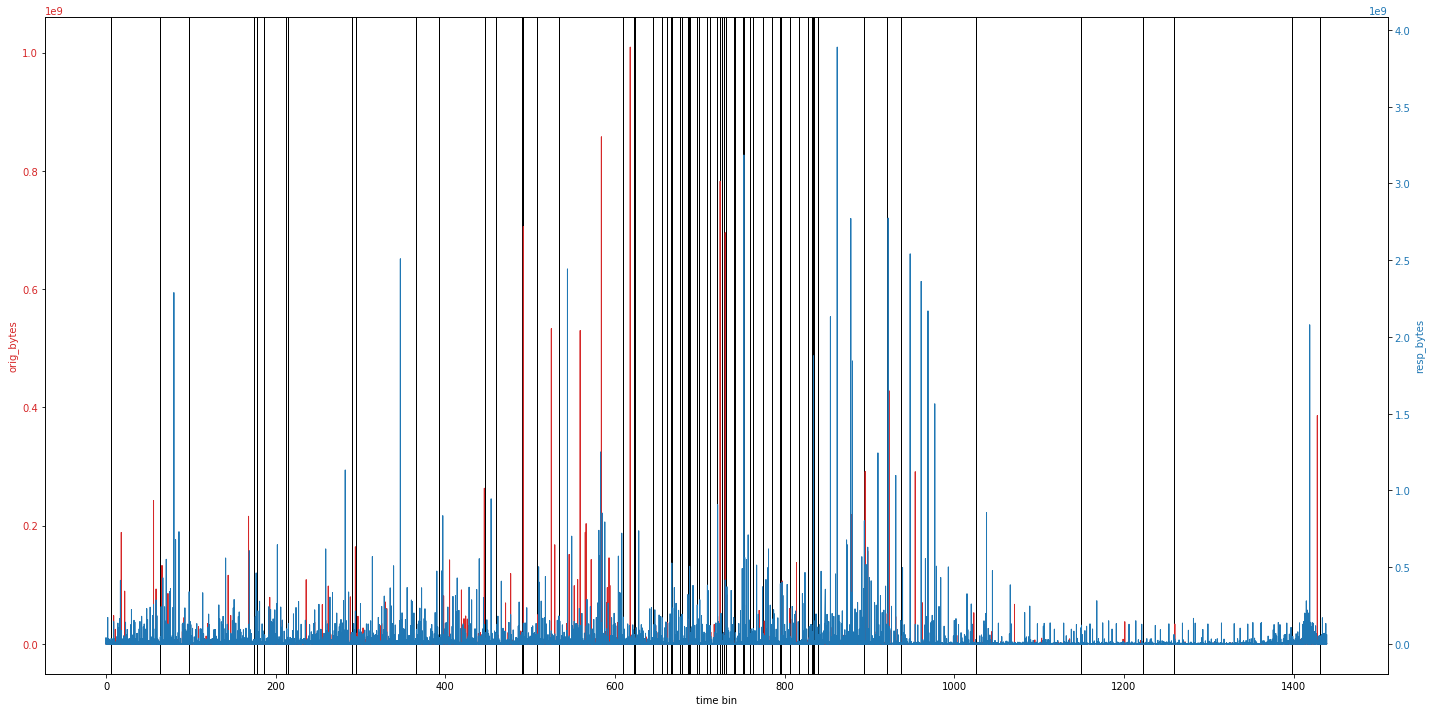

In [60]:
fig, ax1 = plt.subplots(figsize=(20,10))

for i in bad_timebin:
    ax1.axvline(i, color='k', lw=1)
    
color = 'tab:red'
ax1.set_xlabel('time bin')
ax1.set_ylabel('orig_bytes', color=color)
ax1.plot(timeaxis, orbytes, '-', lw=1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('resp_bytes', color=color)  # we already handled the x-label with ax1
ax2.plot(timeaxis, rebytes, '-', lw=1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
plt.show()
# plt.savefig('./figure/bytes_bad_ports.png')

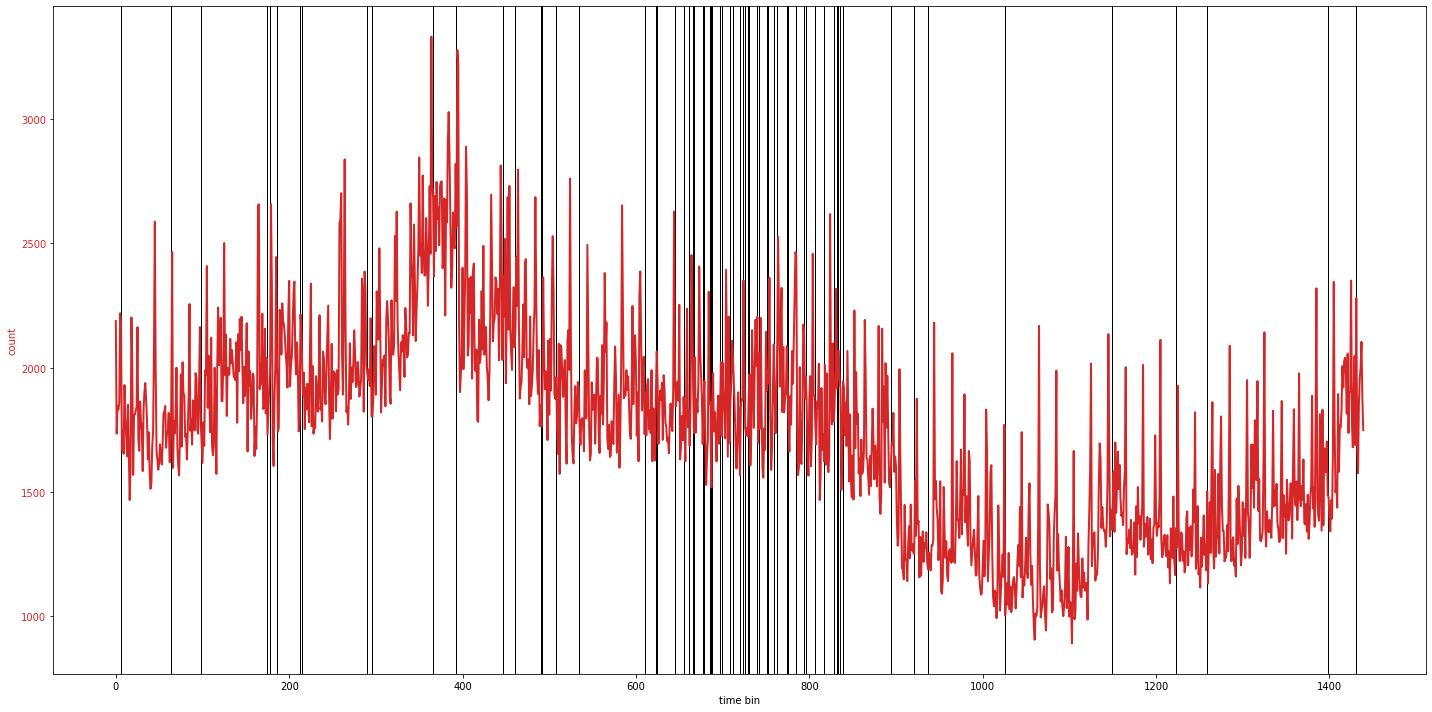

In [61]:
fig, ax1 = plt.subplots(figsize=(20,10))

for i in bad_timebin:
    ax1.axvline(i, color='k', lw=1)
    
color = 'tab:red'
ax1.set_xlabel('time bin')
ax1.set_ylabel('count', color=color)
ax1.plot(tv, cc, '-', lw=2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
plt.show()
# plt.savefig('./figure/count_bad_ports.png')